In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.pipeline import Pipeline, FeatureUnion


In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Collection and Loss Reverse Forecast\modelling\nasabah\regresi\data_baru\new_data.csv")
df.head()

,Unnamed: 0,net_income,loan_amount,avg_amounts_previous_bills,avg_previous_payment,amount_of_late,late_payment_amount,credit_score,arrears_amounts,aging,employment_type,loss_reverse
0,0,15500000.0,1.562500e+07,29500000.0,24350000.0,2.0,1.0,670.0,0.0,DPK,Retired,0.000000e+00
1,1,17500000.0,1.770833e+07,3000000.0,1600000.0,31.0,3.0,402.0,1.0,DPK,Full-time,1.770833e+07
2,2,17500000.0,1.483333e+07,13500000.0,9050000.0,0.0,0.0,505.0,0.0,Lancar,Full-time,0.000000e+00
3,3,15500000.0,1.529167e+07,10500000.0,8350000.0,64.0,5.0,508.0,1.0,DPK,Retired,1.529167e+07
4,4,8700000.0,1.404167e+07,6500000.0,5750000.0,14.0,2.0,371.0,0.0,DPK,Contract,0.000000e+00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  5000 non-null   int64  
 1   net_income                  5000 non-null   float64
 2   loan_amount                 5000 non-null   float64
 3   avg_amounts_previous_bills  5000 non-null   float64
 4   avg_previous_payment        5000 non-null   float64
 5   amount_of_late              5000 non-null   float64
 6   late_payment_amount         5000 non-null   float64
 7   credit_score                5000 non-null   float64
 8   arrears_amounts             5000 non-null   float64
 9   aging                       5000 non-null   object 
 10  employment_type             5000 non-null   object 
 11  loss_reverse                5000 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 468.9+ KB


In [4]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")
        
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   net_income                  5000 non-null   float64 
 1   loan_amount                 5000 non-null   float64 
 2   avg_amounts_previous_bills  5000 non-null   float64 
 3   avg_previous_payment        5000 non-null   float64 
 4   amount_of_late              5000 non-null   float64 
 5   late_payment_amount         5000 non-null   float64 
 6   credit_score                5000 non-null   float64 
 7   arrears_amounts             5000 non-null   float64 
 8   aging                       5000 non-null   category
 9   employment_type             5000 non-null   category
 10  loss_reverse                5000 non-null   float64 
dtypes: category(2), float64(9)
memory usage: 362.0 KB


In [5]:
aging = {"Lancar": 0, "DPK": 1, "Kurang lancar": 2, "Diragukan": 3, "Macet": 4}
employment_type = {"Not-employed": 0, "Self-employed": 1, "Internship": 2, "Part-time": 3, "Contract": 4, "Full-time": 5, "Retired": 6}
columns = {"aging" : aging, "employment_type": employment_type}

for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object":
        df[i] = [columns[i][j] for j in df[i]]
             
scaler = RobustScaler().fit(df[[i for i in df.columns if i not in columns]])
df2 = pd.DataFrame(scaler.transform(df[[i for i in df.columns if i not in columns]]), columns=df[[i for i in df.columns if i not in columns]].columns)
for i in columns:
    df2[i] = df[i]
df2.head(5)

,net_income,loan_amount,avg_amounts_previous_bills,avg_previous_payment,amount_of_late,late_payment_amount,credit_score,arrears_amounts,loss_reverse,aging,employment_type
0,0.000000,0.190476,1.24,1.431472,-0.800000,-0.6,1.589041,-1.0,-0.928218,1,6
1,0.266667,0.984127,-0.88,-0.878173,-0.413333,-0.2,0.365297,0.0,0.123762,1,5
2,0.266667,-0.111111,-0.04,-0.121827,-0.826667,-0.8,0.835616,-1.0,-0.928218,0,5
3,0.000000,0.063492,-0.28,-0.192893,0.026667,0.2,0.849315,0.0,-0.019802,1,6
4,-0.906667,-0.412698,-0.60,-0.456853,-0.640000,-0.4,0.223744,-1.0,-0.928218,1,4


In [6]:
y = df2["loss_reverse"]
X = df2.drop("loss_reverse", axis=1)
pca = PCA()
pca.fit(X)

PCA()

In [7]:
# Tentukan jumlah principal component yang optimal
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

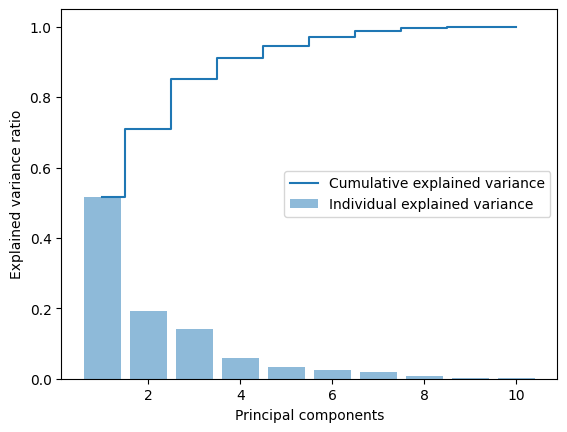

In [8]:
# Tampilkan visualisasi dari hasil PCA dengan warna yang berbeda untuk masing-masing principal component
plt.bar(range(1, len(cum_var_exp)+1), var_exp, alpha=0.5, align="center", label="Individual explained variance")
plt.step(range(1, len(cum_var_exp)+1), cum_var_exp, where="mid", label="Cumulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal components")
plt.legend(loc="best")
plt.show()

In [9]:
# Mengambil komponen utama yang paling penting (misalnya, dua komponen pertama)
features = np.array(X.columns)
n_top_components = 6
top_component_indices = np.argsort(np.abs(pca.components_))[:, -n_top_components:]

# Mengambil nama fitur-fitur yang paling penting
top_feature_names = [features[i] for i in top_component_indices]

print("Fitur-fitur yang paling penting:")
for i, feature_set in enumerate(top_feature_names):
    print(f"Komponen Utama {i + 1}: {', '.join(feature_set)}")

Fitur-fitur yang paling penting:
Komponen Utama 1: employment_type, credit_score, avg_previous_payment, avg_amounts_previous_bills, net_income, loan_amount
Komponen Utama 2: credit_score, late_payment_amount, employment_type, amount_of_late, aging, arrears_amounts
Komponen Utama 3: avg_previous_payment, avg_amounts_previous_bills, amount_of_late, aging, arrears_amounts, employment_type
Komponen Utama 4: arrears_amounts, net_income, employment_type, loan_amount, avg_amounts_previous_bills, avg_previous_payment
Komponen Utama 5: late_payment_amount, employment_type, loan_amount, net_income, arrears_amounts, credit_score
Komponen Utama 6: employment_type, loan_amount, late_payment_amount, aging, arrears_amounts, net_income
Komponen Utama 7: loan_amount, amount_of_late, arrears_amounts, net_income, credit_score, aging
Komponen Utama 8: arrears_amounts, net_income, credit_score, amount_of_late, aging, late_payment_amount
Komponen Utama 9: amount_of_late, employment_type, loan_amount, late_p

In [10]:
# Temukan jumlah komponen utama yang menjelaskan sebagian besar varians
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.98) + 1
print(f'Jumlah komponen utama yang menjelaskan 98% varians: {n_components}')

Jumlah komponen utama yang menjelaskan 98% varians: 7


In [11]:
features = np.array(X.columns)
select = SelectKBest(score_func=f_regression, k=6)
z = select.fit_transform(X, y) 

In [12]:
filterr = select.get_support()
features[filterr]

array(['net_income', 'loan_amount', 'amount_of_late',
       'late_payment_amount', 'arrears_amounts', 'aging'], dtype=object)

In [13]:
num_features_to_select = 6
# Buat instance PCA
pca = PCA(n_components=num_features_to_select)

# Buat instance SelectKBest dengan uji statistik f_classif (sesuaikan dengan tipe data dan masalah Anda)
select_k_best = SelectKBest(score_func=f_classif, k=num_features_to_select)

# Gabungkan keduanya dalam pipeline
combined_features = FeatureUnion([("pca", pca), ("select_k_best", select_k_best)])

# Buat model akhir (misalnya, classifier) setelah pemilihan fitur
# Di sini, kita tidak menambahkan classifier karena fokus pada pemilihan fitur
# Anda dapat menambahkan classifier sesuai kebutuhan

# Buat pipeline yang menggabungkan seleksi fitur dan model akhir
pipeline = Pipeline([("features", combined_features)])

X_new = pipeline.fit_transform(X, y)



In [14]:
# Setelah Anda memiliki pipeline yang sudah di-fit dan transform (seperti di atas)
# Dapatkan indeks fitur-fitur terbaik dari objek SelectKBest
feature_indices = select_k_best.get_support(indices=True)

# Ambil nama fitur dari dataset asli (misalnya, iris dataset)
selected_feature_names = [features[i] for i in feature_indices]

# Cetak nama-nama fitur yang dipilih
print("Fitur yang dipilih:")
for i, j in enumerate(selected_feature_names):
    print(i+1, j)

Fitur yang dipilih:
1 net_income
2 loan_amount
3 amount_of_late
4 late_payment_amount
5 arrears_amounts
6 aging


In [15]:
columns2 = {"aging" : {j:i for i, j in aging.items()},
           "employment_type": {j:i for i, j in employment_type.items()}}

for i in columns2:
    df2[i] = [columns2[i][j] for j in df2[i]]

df2[[i for i in df.columns if i not in columns]] = scaler.inverse_transform(df2[[i for i in df.columns if i not in columns]])             

df2.head(5)

,net_income,loan_amount,avg_amounts_previous_bills,avg_previous_payment,amount_of_late,late_payment_amount,credit_score,arrears_amounts,loss_reverse,aging,employment_type
0,15500000.0,1.562500e+07,29500000.0,24350000.0,2.0,1.0,670.0,0.0,0.000000e+00,DPK,Retired
1,17500000.0,1.770833e+07,3000000.0,1600000.0,31.0,3.0,402.0,1.0,1.770833e+07,DPK,Full-time
2,17500000.0,1.483333e+07,13500000.0,9050000.0,0.0,0.0,505.0,0.0,0.000000e+00,Lancar,Full-time
3,15500000.0,1.529167e+07,10500000.0,8350000.0,64.0,5.0,508.0,1.0,1.529167e+07,DPK,Retired
4,8700000.0,1.404167e+07,6500000.0,5750000.0,14.0,2.0,371.0,0.0,0.000000e+00,DPK,Contract


In [16]:
df_new = df2[selected_feature_names]
df_new["loss_reverse"] = df2["loss_reverse"]
df_new.head()

C:\Users\DHONI HANIF\AppData\Local\Temp\ipykernel_21128\2143404179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["loss_reverse"] = df2["loss_reverse"]


,net_income,loan_amount,amount_of_late,late_payment_amount,arrears_amounts,aging,loss_reverse
0,15500000.0,1.562500e+07,2.0,1.0,0.0,DPK,0.000000e+00
1,17500000.0,1.770833e+07,31.0,3.0,1.0,DPK,1.770833e+07
2,17500000.0,1.483333e+07,0.0,0.0,0.0,Lancar,0.000000e+00
3,15500000.0,1.529167e+07,64.0,5.0,1.0,DPK,1.529167e+07
4,8700000.0,1.404167e+07,14.0,2.0,0.0,DPK,0.000000e+00


In [17]:
df_new["loss_reverse"].value_counts()

loss_reverse
0.000000e+00    759
1.495833e+07     45
1.470833e+07     38
1.525000e+07     38
1.462500e+07     37
               ... 
5.616667e+07      1
1.061250e+08      1
4.916667e+07      1
8.000000e+06      1
9.791667e+06      1
Name: count, Length: 876, dtype: int64

In [18]:
df_new.to_csv("data_for_clustering.csv")